# Assignment 02

### Deadline: No deadline (no submission needed)

### Deliverables:Quiz during next tutorial

---

## Data

We are using the [Statlog (German Credit Data)](http://archive.ics.uci.edu) dataset. The German Credit dataset classifies people described by a set of 20 features as good or bad credit risk.

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [3]:
# complete dataset
loan_data = pd.read_csv('../datasets/credit/credit-g_csv.csv')

# train_data 
# X_train = pd.read_csv('../datasets/credit/credit_X_train.csv')
X_train = pd.read_csv('../datasets/credit/encoded_credit_X_train.csv')
y_train = pd.read_csv('../datasets/credit/credit_y_train.csv')

# test data
# X_test = pd.read_csv('../datasets/credit/credit_X_test.csv')
X_test = pd.read_csv('../datasets/credit/encoded_credit_X_test.csv')
y_test = pd.read_csv('../datasets/credit/credit_y_test.csv')

In [4]:
feature_names = X_train.columns

--- 
# PART I: Tabular data

---
## 1. Training a black-box model

(5 points)

**1.1** Shortly explain what a multi-layer perceptron is.
A Multi-Layer Perceptron (MLP) is a class of feedforward artificial neural networks composed of fully connected layers of neurons.

It consists of:

Input layer – one neuron per feature

Hidden layer(s) – nonlinear transformation layers

Output layer – produces final prediction

Each neuron performs:

z=wTx+b
z=w
T
x+b

followed by a nonlinear activation function (e.g., ReLU, sigmoid, tanh).

Key properties:

Fully connected architecture

Trained using backpropagation

Can approximate any continuous function (Universal Approximation Theorem)

Suitable for both classification and regression \
**1.2** Use the package `scikit-learn` to train a multi-layer perceptron. The model should have 3 layers: input layer (size equal to the nr of features), 1 hidden layer with 50 units, and an output layer of size 1. Make sure that it is reproducible.

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [6]:

# 4. Scale features (important for MLP)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Define MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),  # 1 hidden layer with 50 units
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

# 6. Train model
mlp.fit(X_train, y_train)

# 7. Evaluate
accuracy = mlp.score(X_test, y_test)
print("Test accuracy:", accuracy)

Test accuracy: 0.69


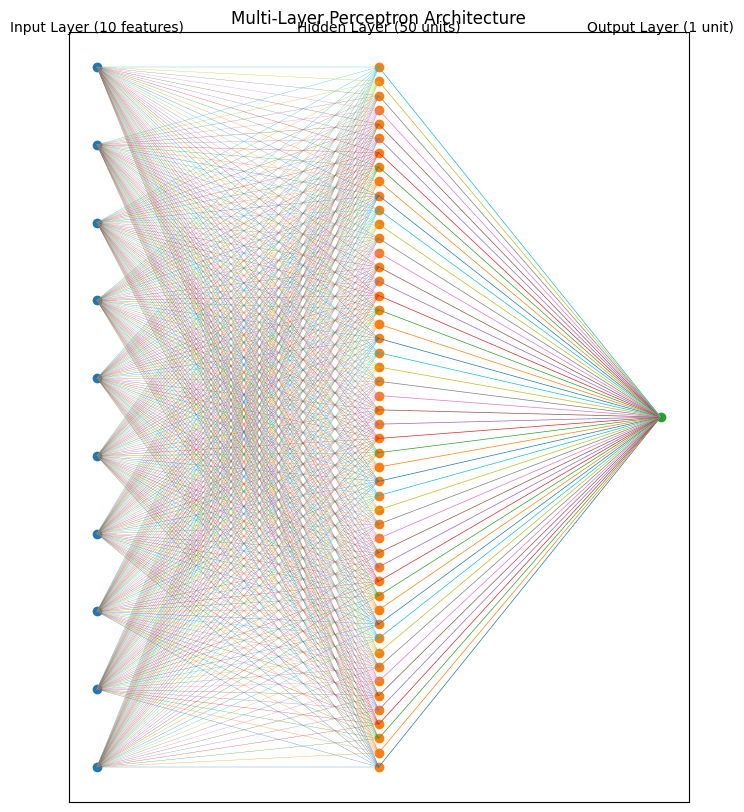

In [7]:
import matplotlib.pyplot as plt
import numpy as np
# Architecture sizes
input_size = 10
hidden_size = 50
output_size = 1

# Create figure
plt.figure(figsize=(8, 10))

# X positions for layers
x_input = 0
x_hidden = 1
x_output = 2

# Y positions
y_input = np.linspace(0, 1, input_size)
y_hidden = np.linspace(0, 1, hidden_size)
y_output = np.linspace(0.5, 0.5, output_size)

# Plot neurons
plt.scatter([x_input]*input_size, y_input)
plt.scatter([x_hidden]*hidden_size, y_hidden)
plt.scatter([x_output]*output_size, y_output)

# Draw connections (input -> hidden)
for yi in y_input:
    for yh in y_hidden:
        plt.plot([x_input, x_hidden], [yi, yh], linewidth=0.2)

# Draw connections (hidden -> output)
for yh in y_hidden:
    for yo in y_output:
        plt.plot([x_hidden, x_output], [yh, yo], linewidth=0.5)

# Labels
plt.text(x_input, 1.05, "Input Layer (10 features)", ha='center')
plt.text(x_hidden, 1.05, "Hidden Layer (50 units)", ha='center')
plt.text(x_output, 1.05, "Output Layer (1 unit)", ha='center')

# Clean up
plt.xticks([])
plt.yticks([])
plt.title("Multi-Layer Perceptron Architecture")
plt.show()


---
## 2. LIME - Tabular

(15 points)

**2.1** Explain the idea of LIME in your own words. \
LIME (Local Interpretable Model-agnostic Explanations) explains a single prediction of a complex model by approximating it locally with a simple, interpretable model.
create perturbed samples and approximate the model locally \
**2.2** What could be a problem when using one-hot encoded features? \
LIME perturbs features independently.
For one-hot encoded variables, this can create invalid combinations, like two active at the same time.\
Importance is split for each of the encoded features


**2.3** Apply LIME to a sample from the test set. The explanation should include 10 features. Explain the output.

**2.4** Explain how LIME works for images in your own words.

The image is divided into superpixels (groups of similar neighboring pixels).\
Each superpixel is a feature\
Randomly superpixel is on/off\
local linear model fit\
each perturned sample is weighted by proximity\
Superpixels with large positive weights are highlighted.

In [11]:
!pip install lime

  Using cached lime-0.2.0.1.tar.gz (275 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached networkx-3.6.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached imageio-2.37.2-py3-none-any.whl.metadata (9.7 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 19.8 MB/s  0:00:00 eta 0:00:01
Using cached imageio-2.37.2-py3-none-any.whl (317 kB)
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Using cached networkx-3.6.1-py3-none-any.whl (2.1 MB)
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283913 sha256=90e480db09f5e94725ffa77857eb2d19382c34baa15015b5ad0079e7ea78597e
  Stored in directory: /home/ayushm/.cache/pip/wheels/eb/51/d9/c707b8fa7dee923cf3cb03edaf5c7f2bfeed5b91f5ca72f468
Successfully built lime
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [lime]5/6 [lime]t-image]


In [8]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
from IPython.display import display

# Create explainer
explainer = LimeTabularExplainer(
    training_data=X_train,
    feature_names=feature_names,
    class_names=["Class 0", "Class 1"],
    mode="classification",
    random_state=42
)

# Select one test instance
i = 0
instance = X_test[i]

# Generate explanation with 10 features
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=mlp.predict_proba,
    num_features=10
)

# Show explanation
print(exp.as_list())


[('credit_history_4 <= -0.21', 0.20242859913466002), ('purpose_7 <= -0.16', 0.169918436774179), ('purpose_5 <= -0.09', -0.1584375785040613), ('purpose_8 <= -0.10', -0.14716893075065807), ('duration > 0.26', -0.1446564251222165), ('purpose_1 <= -0.11', -0.13952930335205535), ('purpose_9 <= -0.34', -0.12635994878354273), ('-0.80 < checking_status_3 <= 1.24', 0.12061183381088215), ('savings_status_3 <= -0.23', -0.11636530729067829), ('other_parties_1 <= -0.24', -0.11231794856729828)]


---
## 3. SHAP - Tabular

(10 points)

**3.1** Explain the process of KernelSHAP in your own words. \
KernelSHAP is a model-agnostic method to explain individual predictions using ideas from cooperative game theory.\
The main idea:\
Each feature is treated as a "player" in a game.\
The model prediction for one instance is the "payout".\
SHAP values fairly distribute the prediction difference between:\
the actual prediction\
and the average prediction (baseline)\
It computes the contribution of each feature by:\
Sampling different subsets of features\
Replacing missing features with background data\
Observing how the prediction changes\
A weighted linear regression (with a special Shapley kernel) is fitted to estimate each feature’s contribution.\
**3.2** Apply _KernelSHAP_ to your trained neural network. Only use 100 samples of the train data to create the SHAP explainer, as it may be too computationally heavy and take too long. You can do this using `shap.sample(X_train,100)` as parameter inside the function call. Then, compute the SHAP values for all samples in the test set.

**3.3** Inspect the local explanation for the same sample you chose in Q2.3 and interpret the explanation. Use a waterfall plot for that.


**3.4** Take a look at the summary plot as global explanation for the model. Provide a description and interpreation of the global explanation.

100%|██████████| 200/200 [00:36<00:00,  5.47it/s]


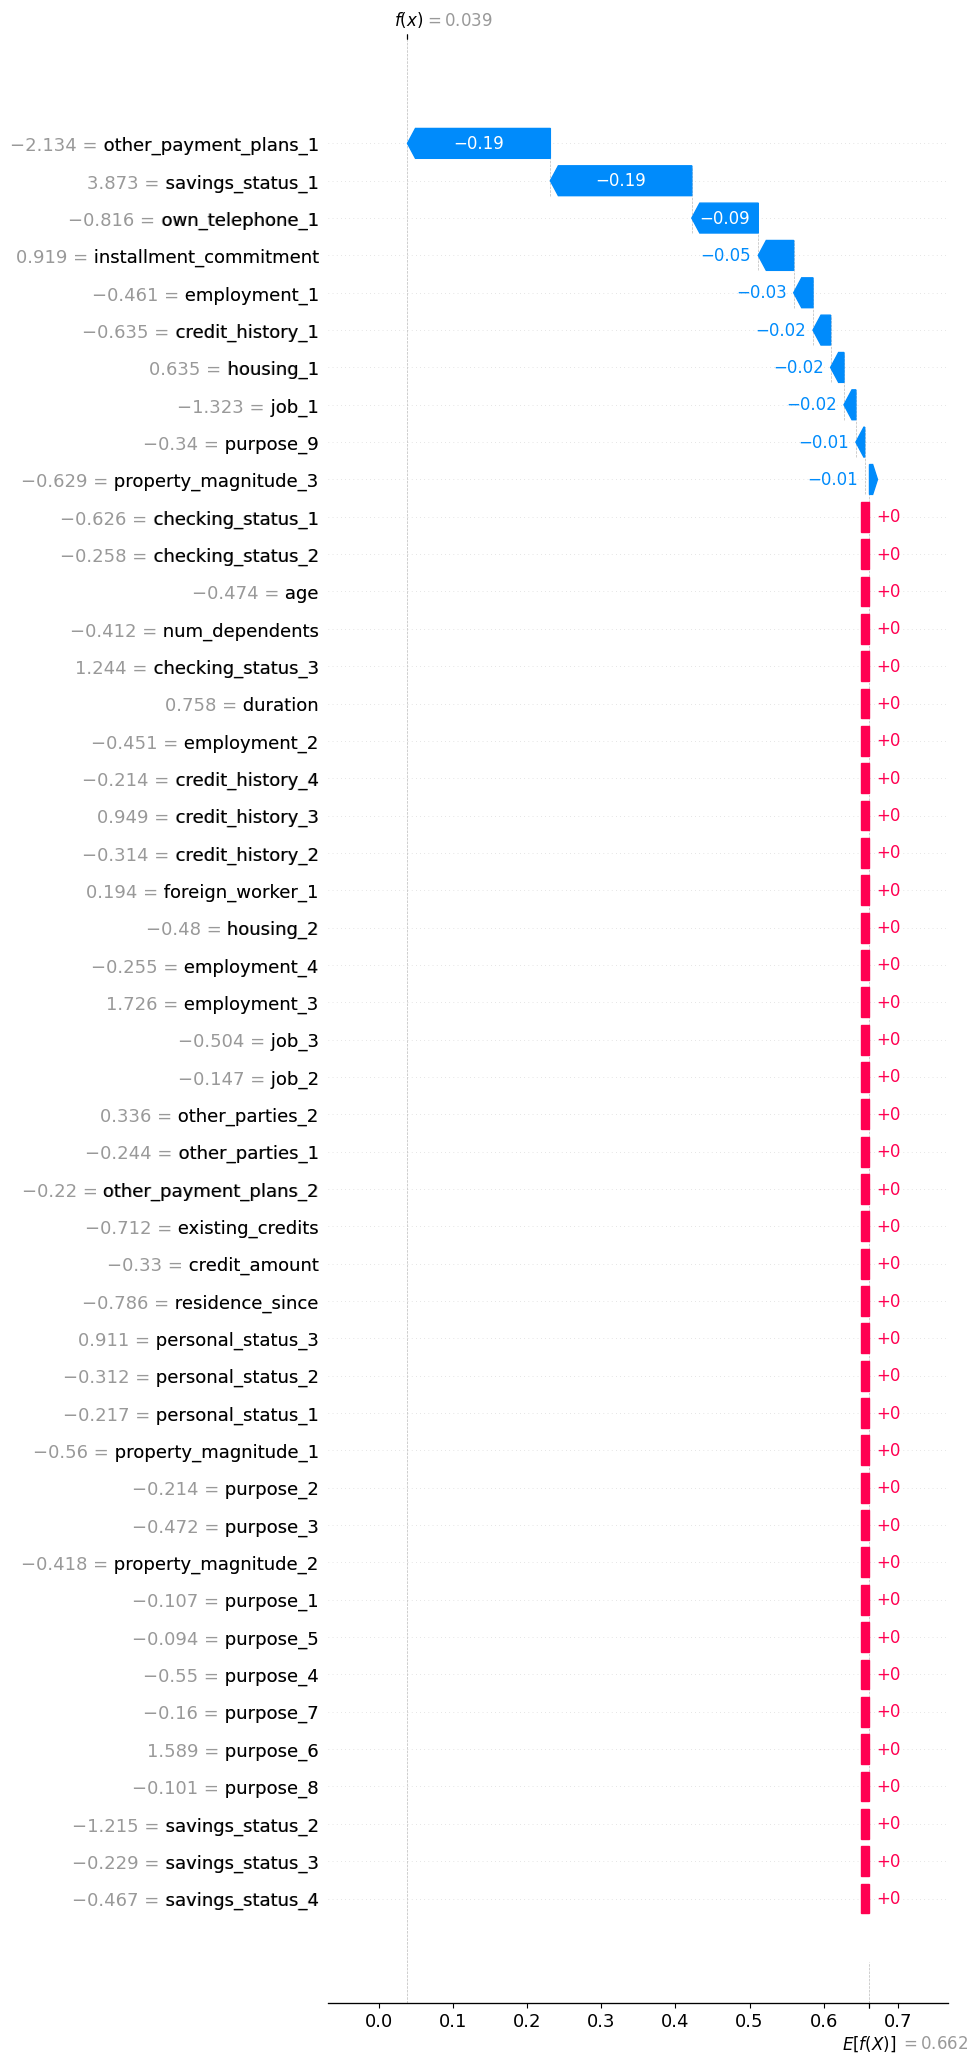

In [13]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# ---- Wrap model to return scalar output ----
def predict_class1_proba(X):
    return mlp.predict_proba(X)[:, 1]

# Background samples
background = shap.sample(X_train, 100, random_state=42)

# Kernel SHAP explainer (scalar output!)
explainer = shap.KernelExplainer(predict_class1_proba, background)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Expected value is now a scalar
expected_value = explainer.expected_value

# Choose sample
sample_index = 0

# Create explanation
expl = shap.Explanation(
    values=shap_values[sample_index],   # length = 48 ✅
    base_values=expected_value,
    data=X_test[sample_index],
    feature_names=feature_names
)

# Waterfall plot (show all features)
shap.plots.waterfall(expl, max_display=len(feature_names))
plt.show()

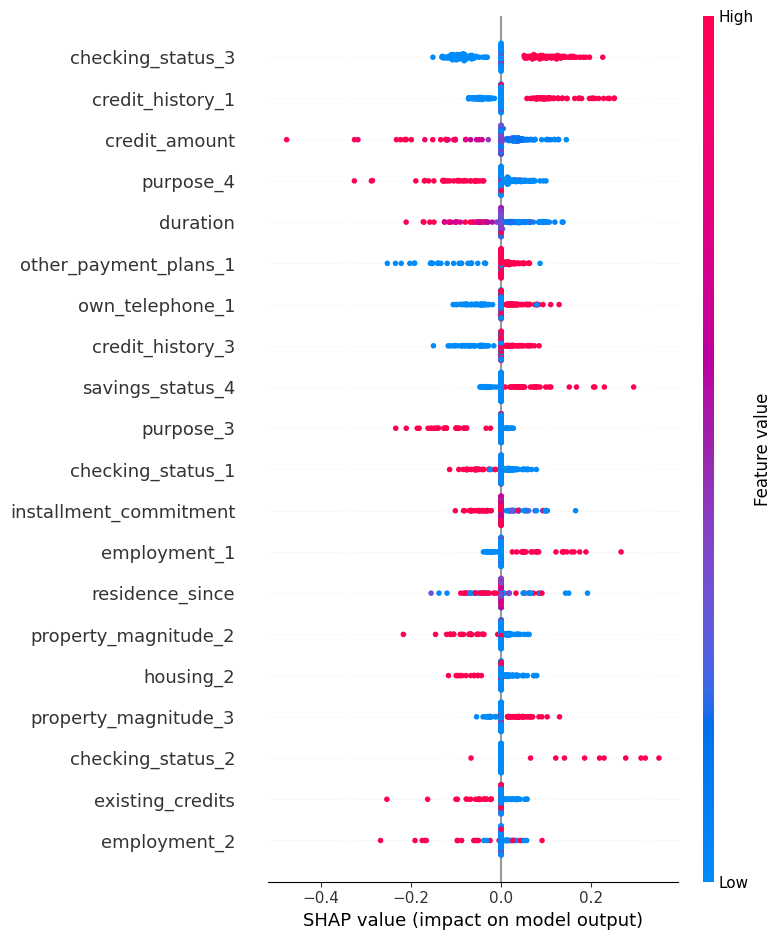

In [14]:
# Example: mean absolute SHAP values for all features
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

---
# PART II: Image data

In the following we would like you to apply both LIME and SHAP to image data. Below, we have prepared some code that you should use. There are blanks in the code that you need to fill in.

For this part we are using a pre-trained model that we can load from `pytorch`. We have provided you the code for that. The model was trained on the ImageNet dataset, which is one of the most popular datasets in computer vision and machine learning. The dataset contains millions of labeled images across thousands of object categories and is often used as benchmark for testing and developing models for object recognition. The model we're using, called VGG16, is a deep neural network with 13 convolutional layers, 5 max-pooling layers, and 3 fully connected layers. 

We want to explain the prediction for two images. For each image, we are interested in the model predictions for the top 5 classes. The code for this is already given. 

We want to generate explanations using LIME and SHAP for both images, for each of the top 5 classes. This is your task. See below for specific instructions.

## 4. LIME - Images

(10 points)

**4.1** Complete the code to generate LIME explanations for the two images at index 26 and 41. Consider these requirements for the code/output: 

Create a 2x6 grid to plot the images and explanations. The following should be the case for the output:
- the first image in each row shows the original image
- the other five images show the explanations for the top 5 classes (from left to right)
- the title of each image should be the class for which the explanation is for

<img src="Lime-expl-scheme.png" alt="drawing" width="700"/>

Read the documentation for LIME for images here: https://lime-ml.readthedocs.io/en/latest/lime.html#module-lime.lime_image 

For the LIME explanation, specify the following parameters:
- the image (each of the two images to explain)
- the classifier function to predict the outcome. You can use `lime_pred()` for that.
- use 100 samples to generate the explanation
- `hide_color = 0`
- get the explanations for the top 5 classes

**4.2** Interpret the output given by LIME for both images.


## 5. SHAP - Images

(5 points)

**5.1** Complete the code to generate SHAP explanations for the two images at index 26 and 41. **For this, follow [this example / online tutorial](https://shap.readthedocs.io/en/latest/example_notebooks/image_examples/image_classification/Explain%20an%20Intermediate%20Layer%20of%20VGG16%20on%20ImageNet%20%28PyTorch%29.html)!.** Note that for this question we will use `shap.GradientExplainer()` instead of `shap.DeepExplainer()` like we did in class.

You can find the documentation here: https://shap.readthedocs.io/en/latest/generated/shap.GradientExplainer.html#shap.GradientExplainer

_Note: SHAP will take really long to run. Use `nsamples = 100` and get explanations for the top 5 classes. If that takes too long, only look at the top 2 classes and/or reduce the number of samples. Please report the decisions and steps you take in your file._

**5.2** Interpret the output given by SHAP for both images.

In [16]:
!pip install torch


  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached fsspec-2026.2.0-py3-none-any.whl.metadata (10 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.8.93-py3-none-manylinux2010_x86_64.manylinux_2_12_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_runtime_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cuda_cupti_cu12-12.8.90-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cudnn_cu12-9.10.2.21-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_cublas_cu12-12.8.4.1-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cufft_cu12-11.3.3.83-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_curand_cu12-10.3.9.90-py3-none-manylinux_2_27_x86_64.whl.metadata (1.7 kB)
  Using cached nvidia_cusolver_cu12-11.7.3.90-py3-none-manylinux_2_27_x86_64.whl.metadata (1.8 kB)
  Usin

In [18]:
!pip install torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 17.6 MB/s  0:00:00 eta 0:00:01


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/ayushm/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:32<00:00, 17.3MB/s] 


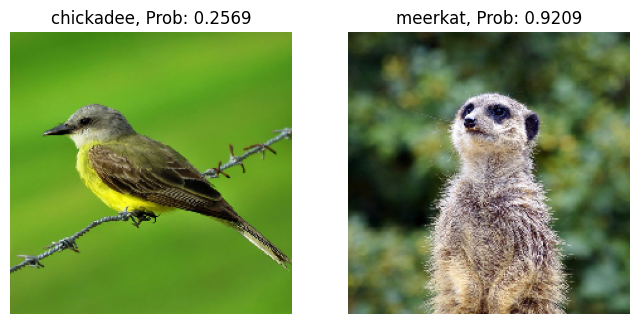

In [19]:
## ****************************************************************************
##                             do not change this code
## ****************************************************************************

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.models as models
from lime import lime_image
import shap
import json

## ----------------------------------------------------------------------------
##                             helper functions
## ----------------------------------------------------------------------------
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

def normalize(image):
    if image.max() > 1:
        image /= 255
    image = (image - mean) / std
    # in addition, roll the axis so that they suit pytorch
    return torch.tensor(image.swapaxes(-1, 1).swapaxes(2, 3)).float()

def lime_pred(img):
    model.eval()
    img = torch.tensor(img).permute(0,3,1,2)
    output = model(img.float())
    return output.detach().numpy()

## ----------------------------------------------------------------------------
##                             load the model
## ----------------------------------------------------------------------------
model = models.vgg16(weights='VGG16_Weights.IMAGENET1K_V1')
model.eval()

# load the ImageNet class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)
    
# load some example data
X, y = shap.datasets.imagenet50()
X /= 255

## ----------------------------------------------------------------------------
##                             inspect images to explain
## ----------------------------------------------------------------------------

to_explain = X[[26,41]]

# get predictions for images to explain
num_classes = 5
output = model(normalize(to_explain))
probabilities = torch.nn.functional.softmax(output, dim=1)
top_prob, top_idx = torch.topk(probabilities, num_classes)

# plot images
f, axes = plt.subplots(1,2,figsize=(8, 5))
for i in range(len(to_explain)):
    axes[i].imshow(to_explain[i])
    axes[i].set_title(f'{class_names[str(top_idx[i][0].item())][1]}, Prob: {round(top_prob[i][0].item(),4)}')
    axes[i].axis('off')

100%|██████████| 100/100 [00:08<00:00, 11.65it/s]


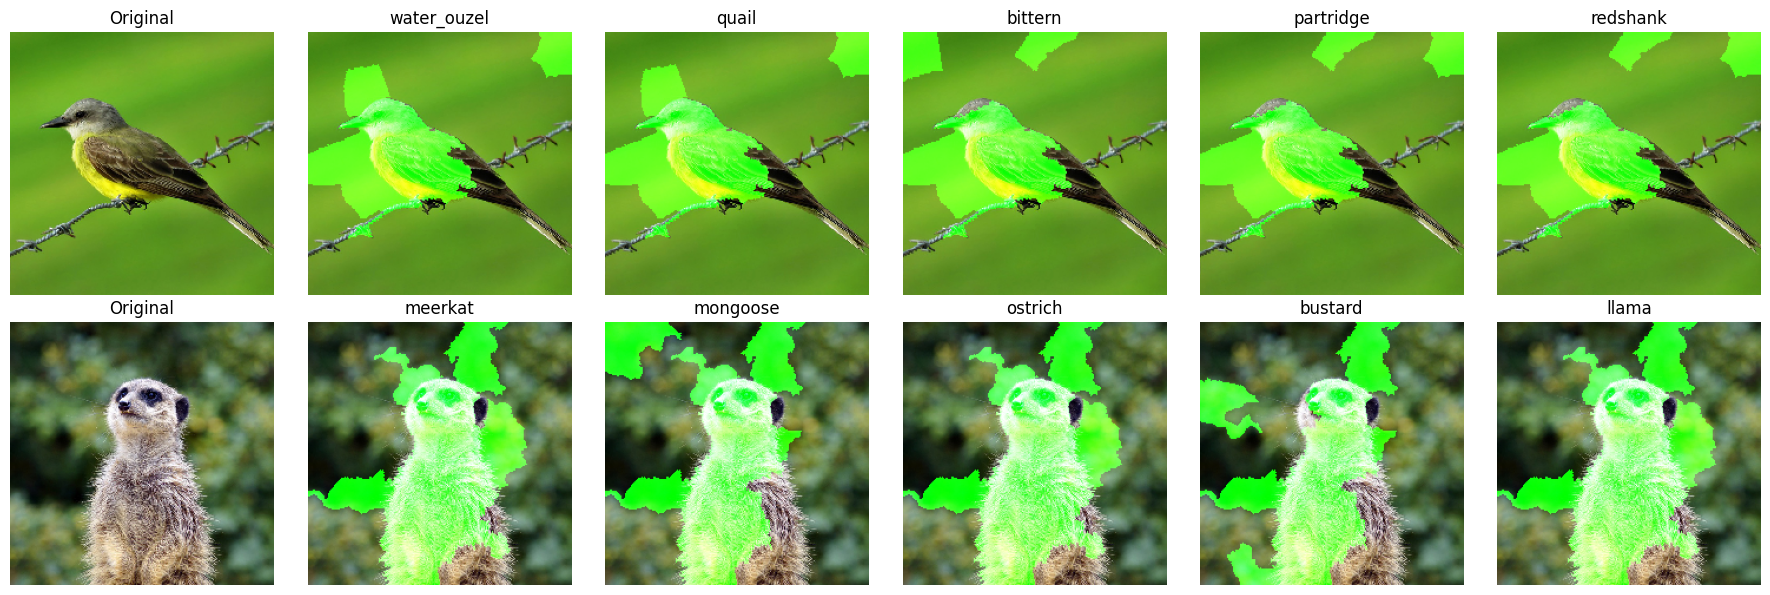

In [23]:
from skimage.segmentation import slic
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

fig, axes = plt.subplots(2, 6, figsize=(18, 6))

for row_idx in range(len(to_explain)):
    image = to_explain[row_idx]

    # ---- Original image ----
    axes[row_idx, 0].imshow(image)
    axes[row_idx, 0].axis('off')
    axes[row_idx, 0].set_title("Original")

    # ---- LIME explanation ----
    explanation = explainer.explain_instance(
        image=image,
        classifier_fn=lime_pred,
        top_labels=5,
        hide_color=0,
        num_samples=100,
        segmentation_fn=lambda x: slic(x, n_segments=50, compactness=10)
    )

    for col_idx, class_id in enumerate(explanation.top_labels, start=1):
        temp, mask = explanation.get_image_and_mask(
            label=class_id,
            positive_only=False,   # 🔑
            hide_rest=False,
            num_features=5,        # 🔑
            min_weight=0.0
        )

        axes[row_idx, col_idx].imshow(temp)
        axes[row_idx, col_idx].axis('off')
        axes[row_idx, col_idx].set_title(class_names[str(class_id)][1])
plt.tight_layout()
plt.show()

In [25]:
## ----------------------------------------------------------------------------
##                            SHAP explanations
## ----------------------------------------------------------------------------

# select the two images to explain
images = normalize(to_explain)

# background images (small subset for speed)
background = images[:1]

# -------
# initialize the explanation instance
# -------
e = shap.GradientExplainer(
    model,
    background
)

# -------
# generate explanations
# -------
# explain top 5 classes, use nsamples=100 as requested
shap_values, indexes = e.shap_values(
    images,
    nsamples=100,
    ranked_outputs=5
)

# the latest version of shap provides shap_values in a numpy array, however we need
# them to be in a list for the code as shown in the shap example linked above to work
if isinstance(shap_values, np.ndarray):
    print('shap_values is a numpy array and will be transformed to a list.')
    shap_values = [shap_values[..., i] for i in range(shap_values.shape[-1])]

# -------
# get the class names and plot explanations
# -------
# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# rotate shap values to match image shape
shap_values = [np.swapaxes(np.swapaxes(s, 2, 3), 1, -1) for s in shap_values]

# plot explanations
shap.image_plot(
    shap_values,
    to_explain,
    labels=index_names
)

KeyboardInterrupt: 


# PART III: Discussion

## 6. Discussion

(10 points)

**6.1** Look at assignment 01 and the models you have trained there. Compare the model performance of the glassbox models to the neural network you have trained in this assignment. What do you observe and how can you explain it?
LIME and SHAP explain a black box model, post doc\ 
EBM, RUG and logreg are interpretable by design
**6.2** Name and explain two different criticisms of feature importance methods.
- Don't show causality
- Unstable

**6.3** Compare the output provided by LIME and SHAP for images using the two images from PART II as example.
